# **Logistic Regression**

## 数据简介

我们建立一个逻辑回归的模型来预测一个学生是否被大学录取。假设你是一个大学系的管理员，你想根据两次考试结果来决定每个申请人的录取机会。你有以前的申请人的历史数据，你可以用它作为逻辑回归的训练集。对于每一个培训例子，你有两个考试的申请人的分数和录取决定。为了做到这一点，我们将建立一个分类模型，根据考试成绩估计入学概率。

In [1]:
# 图像显现中文字体
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']  

# 画图显示负号
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
origi_data = pd.read_csv('LogiReg_data.txt', header = None, names = ['Exam1', 'Exam2', 'Admitted'])
origi_data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
origi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Exam1       100 non-null float64
Exam2       100 non-null float64
Admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [5]:
# 切分数据集
admitted = origi_data[origi_data['Admitted'] == 1] 
non_admitted = origi_data[origi_data['Admitted'] == 0]

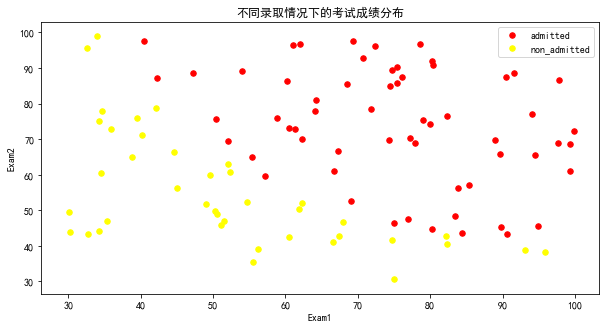

In [6]:
# 对成绩录取情况进行可视化
fig,ax = plt.subplots(figsize = (10,5))

ax.scatter(admitted['Exam1'], admitted['Exam2'], marker = 'o', s = 30, c = 'r', label = 'admitted')
ax.scatter(non_admitted['Exam1'], non_admitted['Exam2'], marker = 'o', s = 30, c= 'yellow', label = 'non_admitted')
ax.set_xlabel('Exam1')
ax.set_ylabel('Exam2')
ax.set_title('不同录取情况下的考试成绩分布')
ax.legend()

可以画出决策边界分隔录取及未录取情况

# The logistic regression

目标：建立分类器（求解三个参数$\theta_0\theta_1\theta_2$）

设定阈值，根据阈值判断录取结果

In [7]:
# 对数据添加一列1
origi_data.insert(0, 'ones', 1)

# 将df格式转换为矩阵格式
data = origi_data.as_matrix()

In [8]:
# 提取 X 及 y
cols = data.shape[1]
X = data[:, 0:cols-1]
y = data[:, cols-1:cols]
theta = np.zeros([1,3])

In [9]:
X[:5]

array([[  1.        ,  34.62365962,  78.02469282],
       [  1.        ,  30.28671077,  43.89499752],
       [  1.        ,  35.84740877,  72.90219803],
       [  1.        ,  60.18259939,  86.3085521 ],
       [  1.        ,  79.03273605,  75.34437644]])

In [10]:
y[:5]

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.]])

In [11]:
theta

array([[ 0.,  0.,  0.]])

## 要完成的模块
* sigmoid：映射到概率的函数
* model：线性回归返回预测值
* cost：根据参数计算损失
* gradient：计算每个参数的梯度方向
* descent：进行参数更新
* accuracy：计算精度

1 **sigmoid**

$$
g\left( z \right) =\frac{1}{1+e^{-z}}
$$


In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

Text(7,0.53,'默认阈值0.5')

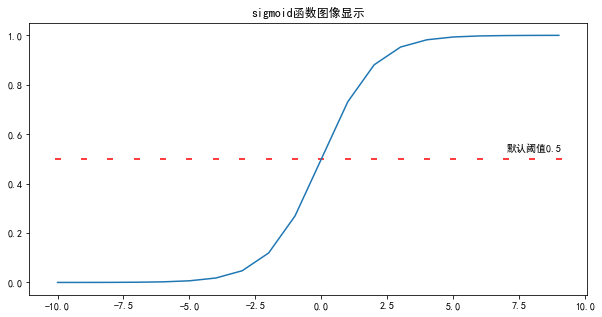

In [13]:
# sigmoid 函数可视化

x = np.arange(-10, 10)
y = [sigmoid(xx) for xx in x]

fig, ax = plt.subplots(figsize = (10,5))

ax.plot(x, y)
ax.scatter(x, [0.5 for xx in x], c = 'r', marker = '_')
ax.set_title('sigmoid函数图像显示')
ax.text(7, 0.53, '默认阈值0.5')

* g：R→[0,1]
* g：(0) = 0.5
* g：(-∞)=0
* g：(∞)=0

2  **model**

$$
\left( \theta _0,\theta _1,\theta _2 \right) \ \times \left( \begin{array}{c}
	1\\
	x_1\\
	x_2\\
\end{array} \right) =\theta _0+\theta _1x_1+\theta _2x_2
$$

In [14]:
def model(X, theta):
    return sigmoid(X.dot(theta.T))

3 **Cost**

将对数似然函数去负号

$$
D\left( h_{\theta}\left( x \right) ,y \right) =-y\log \left( h_{\theta}\left( x \right) \right) -\left( 1-y \right) \log \left( 1-h_{\theta}\left( x \right) \right) 
$$

求平均损失

$$
J\left( \theta \right) =\frac{1}{m}\sum_{i=1}^m{D\left( h_{\theta}\left( x_i \right) ,y_i \right)}
$$

In [15]:
def cost(X, y, theta):
    left = -y*np.log(model(X, theta))
    right = -(1-y)*np.log(1-model(X, theta))
    return np.sum(left+right)/len(X)

4 **gradient**

$$
\frac{\partial J}{\partial \theta _j}=\frac{1}{m}\sum_{i=1}^m{\left( h_{\theta}\left( x \right) -y \right)}x_{i}^{j}
$$

In [16]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta) - y).ravel()  # 注意要转化为一维矩阵
    for j in range(len(theta.ravel())):
        grad[0,j] = np.sum(error * X[:, j])/len(X)
    return grad 

### 梯度下降

比较不同的梯度下降策略

In [17]:
# 在小批量梯度下降，随机梯度下降中都要用到对数据重新洗牌
import numpy.random

def shuffledata(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:cols]
    return X, y

In [18]:
# 设定三种停止策略

stop_iter = 0
stop_costs = 1
stop_grad = 2

def stop_criterion(stopType, value, thresh):
    if stopType == 0:  return  value >  thresh
    elif stopType == 1:  return  abs(value[-1]-value[-2]) < thresh
    elif stopType == 2:  return  (np.linalg.norm(value)) <thresh

In [19]:
# 梯度下降求解
import time

def gradientdescent(data, theta, batchSize,alpha, stopType, thresh):
    init_time = time.time()
    k = 0 # 后续添加batchSize
    X, y = shuffledata(data)
    grad = np.zeros(theta.shape)  # 设定初始梯度
    costs = [cost(X, y, theta)]  # 初始损失值
    
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize
        if k > data.shape[1]:   # 小批量梯度下降和随机梯度下降中，要对数据进行重新洗牌
            k = 0
            X,y = shuffledata(data)
        theta = theta - alpha*grad
        costs.append(cost(X, y, theta))  
        
        if stopType == stop_iter:
            value = len(costs)
        elif stopType == stop_costs:
            value = costs
        else:
            value = grad
        
        if stop_criterion(stopType, value, thresh):break
    
    return theta, costs, grad, time.time()- init_time

In [20]:
def runExpe(data, theta, batchSize, alpha, stopType, thresh):
    theta, costs, grad, dur = gradientdescent(data, theta, batchSize, alpha, stopType, thresh)
    
    # 画图设置
    name = 'data 学习率{} '.format(alpha)
    if batchSize == data.shape[0]: strbatch = '梯度下降'
    elif batchSize == 1:  strbatch = "随机梯度下降"
    else:  strbatch = "小批量梯度下降({})".format(batchSize)
    name += strbatch
    if stopType == stop_iter: strstop = " 停止策略-迭代次数{}次".format(thresh)
    elif stopType == stop_costs: strstop = " 停止策略:损失值<{}".format(thresh)
    else:  strstop = " 停止策略-梯度二范数<{}".format(thresh)
    name += strstop
    
    print('Theta:{},   grad:{}\n运行时间{:.2f}s'.format(theta, grad, dur))
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.plot(np.arange(len(costs)), costs)
    ax.set_xlabel('迭代次数')
    ax.set_ylabel('损失值')
    ax.set_title(name)
    print('损失值约为{:.3f}\n'.format(costs[-1]))
    
    return theta

### 对比不同停止策略

#### 根据迭代次数 停止

Theta:[[-0.0002712   0.00705204  0.00376738]],   grad:[[ 0.07001492 -0.27172709  0.26656907]]
运行时间1.02s
损失值约为0.631



array([[-0.0002712 ,  0.00705204,  0.00376738]])

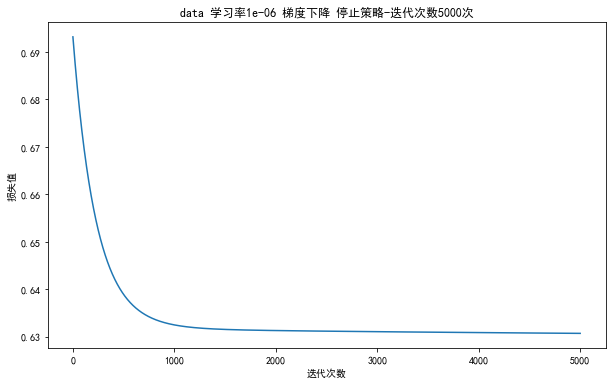

In [21]:
# 基于所有样本进行迭代
runExpe(data, theta, 100, alpha=0.000001, stopType = stop_iter, thresh = 5000)

#### 根据损失值 停止

Theta:[[-11.83778614   0.09998844   0.09388773]],   grad:[[  9.99936158e-03  -7.92280027e-05  -8.00493630e-05]]
运行时间105.36s
损失值约为0.251



array([[-11.83778614,   0.09998844,   0.09388773]])

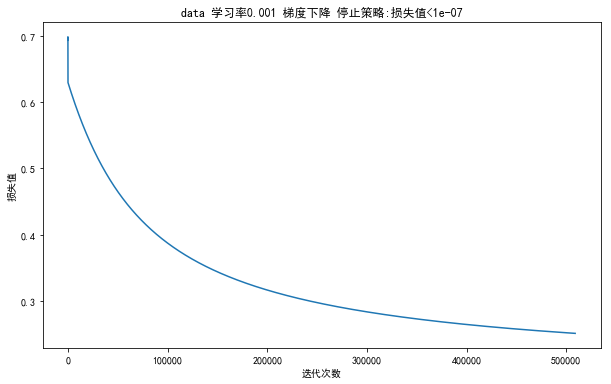

In [22]:
runExpe(data, theta, 100, alpha=0.001, stopType = stop_costs, thresh = 0.0000001)

#### 根据梯度 停止

Theta:[[-11.83778614   0.09998844   0.09388773]],   grad:[[  9.99936158e-03  -7.92280027e-05  -8.00493630e-05]]
运行时间111.39s
损失值约为0.251



array([[-11.83778614,   0.09998844,   0.09388773]])

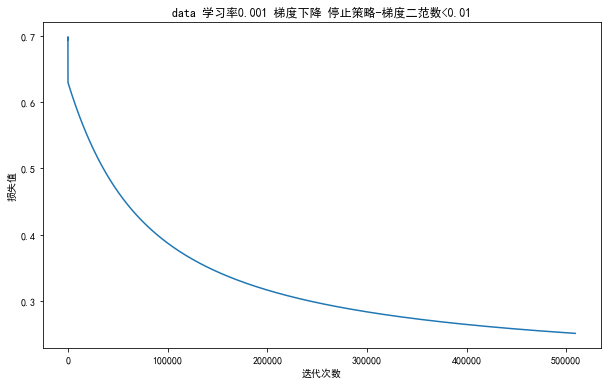

In [23]:
runExpe(data, theta, 100, alpha=0.001, stopType = stop_grad, thresh = 0.01)

虽然损失值下降得很快，但是迭代次数实在太高了，而且theta值很大，可以感觉出有过拟合现象存在！

### 基于不同下降策略

#### 随机梯度下降

Theta:[[-0.38827553  0.044089   -0.04808175]],   grad:[[  0.7818566   25.5845631   33.85999924]]
运行时间0.43s
损失值约为0.959



array([[-0.38827553,  0.044089  , -0.04808175]])

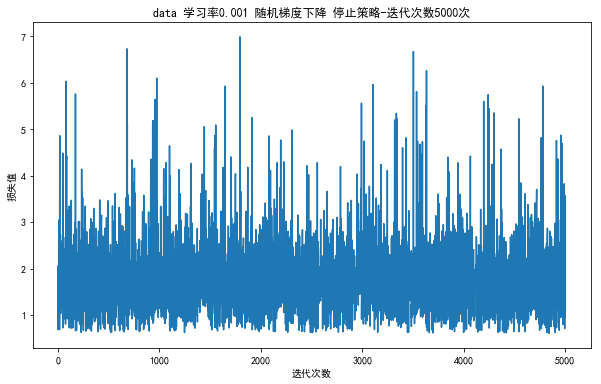

In [24]:
runExpe(data, theta, 1, alpha=0.001, stopType = stop_iter, thresh = 5000)

损失函数非常不稳定，需要调小学习率

Theta:[[-0.00027377  0.00703788  0.00351811]],   grad:[[  0.64926482  40.1441778   32.62952302]]
运行时间0.48s
损失值约为0.631



array([[-0.00027377,  0.00703788,  0.00351811]])

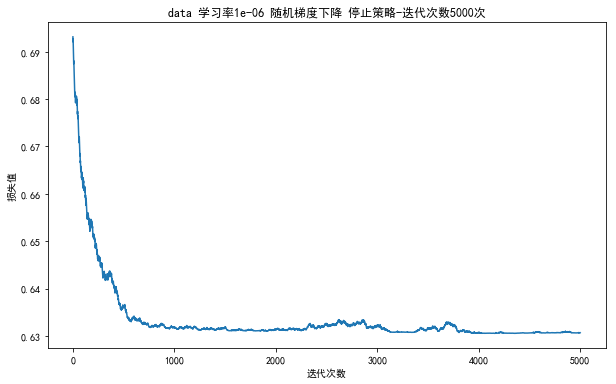

In [25]:
runExpe(data, theta, 1, alpha=0.000001, stopType = stop_iter, thresh = 5000)

#### 批量梯度下降

Theta:[[-0.00342649  0.01104879  0.00079166]],   grad:[[ 0.17516233  5.45060267  6.54910936]]
运行时间1.04s
损失值约为0.630



array([[-0.00342649,  0.01104879,  0.00079166]])

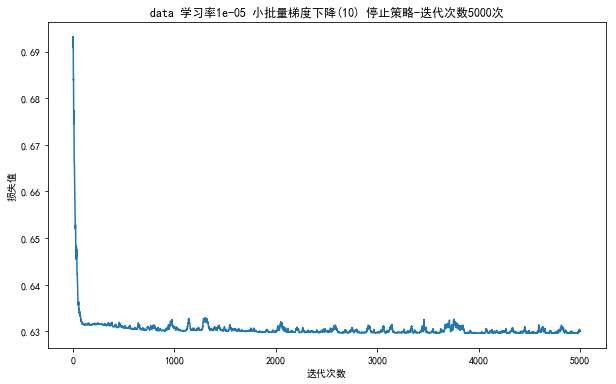

In [26]:
runExpe(data, theta, 10, alpha=0.00001, stopType = stop_iter, thresh = 5000)

浮动仍然比较大，我们来尝试下对数据进行标准化 将数据按其属性(按列进行)减去其均值，然后除以其方差。最后得到的结果是，对每个属性/每列来说所有数据都聚集在0附近，方差值为1

Theta:[[ 0.30926514  0.86504171  0.7721257 ]],   grad:[[-0.27420672  0.07046762 -0.20138705]]
运行时间10.14s
损失值约为0.383



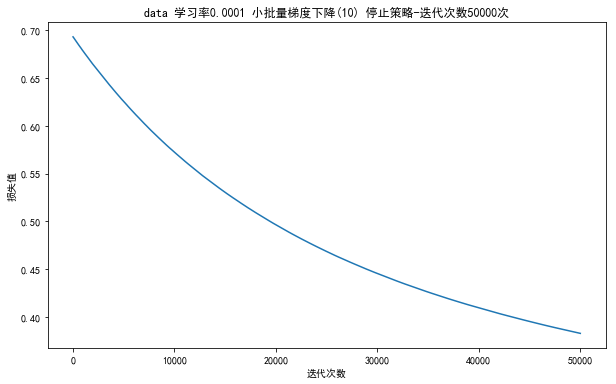

In [60]:
### 对数据进行预处理，特征缩放

from sklearn import preprocessing as pp

scaled_data = data.copy()
scaled_data[:, 1:3] = pp.scale(scaled_data[:, 1:3])

theta = np.zeros([1,3])
theta = runExpe(scaled_data, theta, 10, alpha=0.0001, stopType = stop_iter, thresh = 50000)

### 精度

In [70]:
# 使用得到的 theta 值进行预测

def predict(X, theta):
    return [1 if x>0.5 else 0 for x in model(X, theta)]

In [62]:
scaled_X = scaled_data[:,0:scaled_data.shape[1]-1]
y = scaled_data[:, scaled_data.shape[1]-1:]

predictions = np.array(predict(scaled_X, theta))

In [63]:
accuracy = (np.sum(predictions == y.ravel()))/len(y)
print('精度为{:.2f}'.format(accuracy))

精度为0.90


Theta:[[ 0.46186844  1.27243819  1.15697072]],   grad:[[-0.22226292 -0.0987797  -0.04330634]]
运行时间0.98s
损失值约为0.313



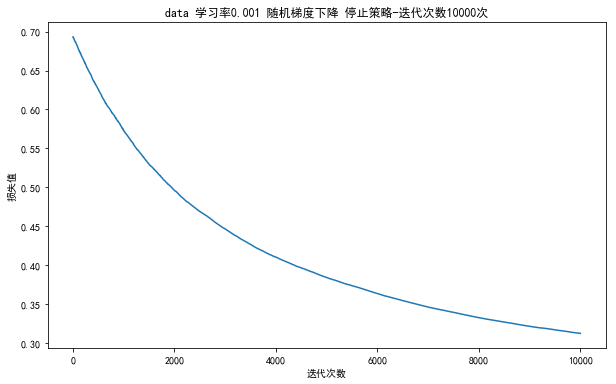

In [64]:
# 随机梯度下降
theta = np.zeros([1,3])
theta = runExpe(scaled_data, theta, 1, alpha=0.001, stopType = stop_iter, thresh = 10000)

In [65]:
scaled_X = scaled_data[:,0:scaled_data.shape[1]-1]
y = scaled_data[:, scaled_data.shape[1]-1:]

predictions = np.array(predict(scaled_X, theta))

In [66]:
accuracy = (np.sum(predictions == y.ravel()))/len(y)
print('精度为{:.2f}'.format(accuracy))

精度为0.90


本次实践感想：
* 停止策略有 迭代次数  损失变化  梯度范数
* 下降策略有 梯度下降 小批量梯度下降 随机梯度下降
* 小批量梯度下降比较常用

本次实践疑惑：
* 特征缩放后随机梯度下降比小批量梯度下降效果好，是否是由于数据比较简单造成？
* 得到$\theta$后能否对开始的图进行画图分类显示 ？